In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file1 = 'birthweight_feature_set.xlsx'

baby = pd.read_excel(file1)

print(baby.columns)
print(baby.head())
print(baby.shape)
print(baby.info())
print(baby.describe().round(2))

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'blparents', 'health', 'mon', 'bwght'],
      dtype='object')
   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  ...  \
0    69     14       5      2    62     14      4      7    23      9  ...   
1    68     12       3     10    61     11      4      6    25     11  ...   
2    71     12       3      6    46     12      2      7    21     12  ...   
3    59     16       1      8    48     16      7      8    21     10  ...   
4    48     12       4      6    39     12      2      9    17     13  ...   

   mwhte  mblck  moth  fwhte  fblck  foth  blparents  health  mon  bwght  
0      0      1     0      0      1     0          1       0    0    697  
1      1      0     0      1      0     0          0       0    0   1290  
2      0      1     0      0      1     0          1       1    0   1490  


In [2]:
#Missing values
print(baby.isnull().sum())
total_baby_rows = baby.shape[0]
missing_baby = baby.isnull().sum()

missing_ratio = (missing_baby / total_baby_rows).multiply(100)
print (missing_ratio.round(2))
type (missing_ratio)

mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
blparents    0
health       0
mon          0
bwght        0
dtype: int64
mage         0.0
meduc        0.0
monpre       0.0
npvis        0.0
fage         0.0
feduc        0.0
omaps        0.0
fmaps        0.0
cigs         0.0
drink        0.0
male         0.0
mwhte        0.0
mblck        0.0
moth         0.0
fwhte        0.0
fblck        0.0
foth         0.0
blparents    0.0
health       0.0
mon          0.0
bwght        0.0
dtype: float64


pandas.core.series.Series

In [3]:
###############################################################################
#2 Missing Value Imputation
###############################################################################

#Histograms before imputation – to check the skewness so that the col can be imputed accordingly
null_cols = baby.columns[baby.isna().any()].tolist()

for col in null_cols:
    plt.figure()
    sns.distplot(baby[col], hist=False, rug=True)
      
#Loop to imput the median of the Col for each mssing value
for col in baby:
    if baby[col].isnull().any():
        baby[col] = baby[col].fillna(baby[col].median())

print(baby.isnull().sum())

mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
blparents    0
health       0
mon          0
bwght        0
dtype: int64


In [4]:
###############################################################################
#3 Outlier Analysis
###############################################################################

baby1= pd.DataFrame.copy(baby)
for col in null_cols:
    plt.figure()
    sns.distplot(baby1[col], hist=False, rug=True)
    
##### 3.1 Quantiles and type of variable classification
baby_quantiles = baby1.loc[:, :].quantile([0.20,0.40,0.60,0.80,1.00])
print(baby_quantiles)                                                
                                                                                                
for col in baby1:
    print(col)          

     mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  ...  \
0.2  32.0   12.0     1.0    9.0  33.0   12.0    8.0    9.0   5.0    3.0  ...   
0.4  37.0   13.0     2.0   11.0  36.0   12.0    8.0    9.0   9.0    4.0  ...   
0.6  41.0   14.0     2.0   12.0  39.0   16.0    9.0    9.0  13.0    6.0  ...   
0.8  48.0   16.0     3.0   13.0  45.0   16.0    9.0    9.0  16.0    8.0  ...   
1.0  71.0   17.0     8.0   35.0  73.0   17.0   10.0   10.0  25.0   14.0  ...   

     mwhte  mblck  moth  fwhte  fblck  foth  blparents  health  mon   bwght  
0.2    0.0    0.0   0.0    0.0    0.0   0.0        0.0     0.0  0.0  2799.0  
0.4    0.0    0.0   0.0    0.0    0.0   0.0        0.0     0.0  1.0  3203.0  
0.6    0.0    0.0   0.0    0.0    0.0   0.0        0.0     1.0  1.0  3629.0  
0.8    1.0    1.0   1.0    1.0    1.0   1.0        1.0     1.0  1.0  3827.0  
1.0    1.0    1.0   1.0    1.0    1.0   1.0        1.0     1.0  1.0  4933.0  

[5 rows x 21 columns]
mage
meduc
monpre
npvis
fage

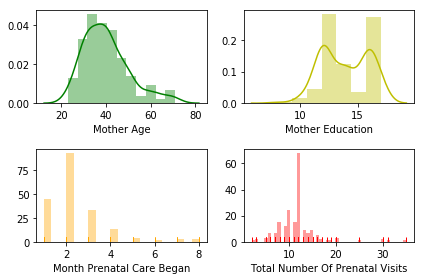

In [5]:
##### 3.2 Visual EDA (Histograms) to see the distributions and determine Min and Max.

plt.subplot(2, 2, 1)
sns.distplot(baby1['mage'],
#             bins = 35,
             color = 'g')

plt.xlabel('Mother Age')


########################


plt.subplot(2, 2, 2)
sns.distplot(baby1['meduc'],
#             bins = 30,
             color = 'y')

plt.xlabel('Mother Education')



########################


plt.subplot(2, 2, 3)
sns.distplot(baby1['monpre'],
#             bins = 17,
             kde = False,
             rug = True,
             color = 'orange')

plt.xlabel('Month Prenatal Care Began')



########################


plt.subplot(2, 2, 4)

sns.distplot(baby1['npvis'],
#             bins = 17,
             kde = False,
             rug = True,
             color = 'r')

plt.xlabel('Total Number Of Prenatal Visits')



plt.tight_layout()
plt.savefig('Baby Data Histograms 1 of 5.png')

plt.show()

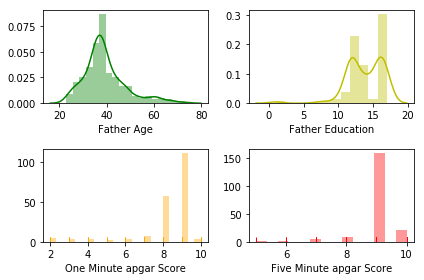

In [6]:
plt.subplot(2, 2, 1)
sns.distplot(baby1['fage'],
#             bins = 35,
             color = 'g')

plt.xlabel('Father Age')


########################


plt.subplot(2, 2, 2)
sns.distplot(baby1['feduc'],
#             bins = 30,
             color = 'y')

plt.xlabel('Father Education')



########################


plt.subplot(2, 2, 3)
sns.distplot(baby1['omaps'],
#             bins = 17,
             kde = False,
             rug = True,
             color = 'orange')

plt.xlabel('One Minute apgar Score')



########################


plt.subplot(2, 2, 4)

sns.distplot(baby1['fmaps'],
#             bins = 17,
             kde = False,
             rug = True,
             color = 'r')

plt.xlabel('Five Minute apgar Score')



plt.tight_layout()
plt.savefig('Baby Data Histograms 2 of 5.png')

plt.show()

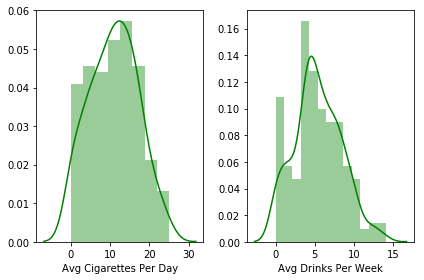

In [7]:
plt.subplot(1, 2, 1)
sns.distplot(baby1['cigs'],
#             bins = 35,
             color = 'g')

plt.xlabel('Avg Cigarettes Per Day')

plt.subplot(1, 2, 2)
sns.distplot(baby1['drink'],
#             bins = 35,
             color = 'g')

plt.xlabel('Avg Drinks Per Week')

plt.tight_layout()
plt.savefig('Baby Data Histograms 3 of 5.png')

plt.show()


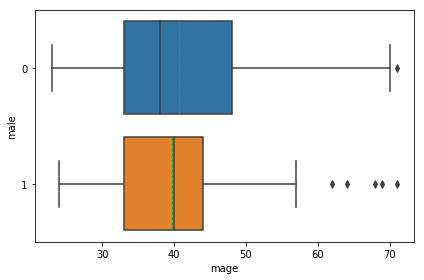

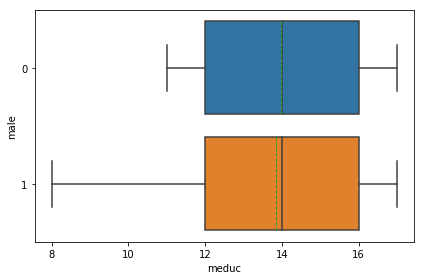

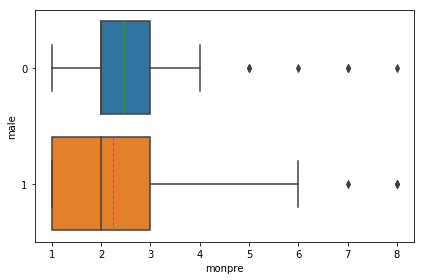

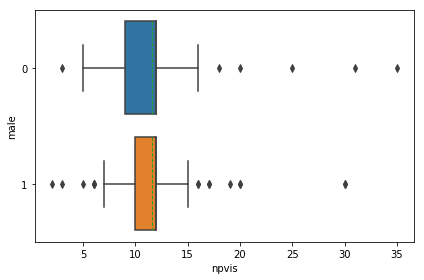

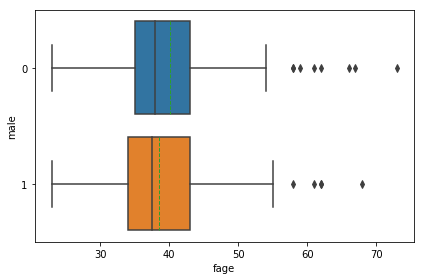

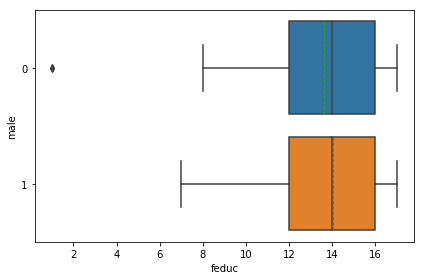

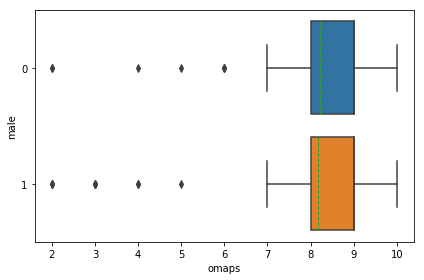

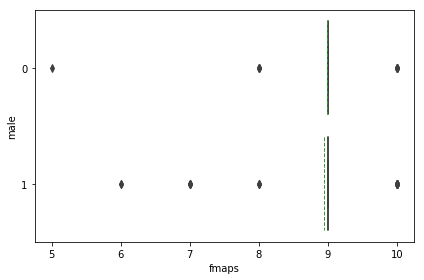

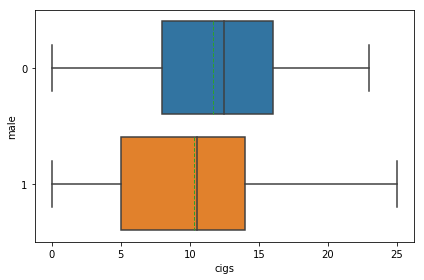

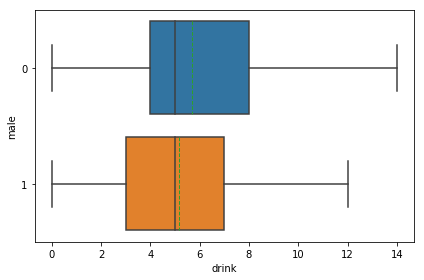

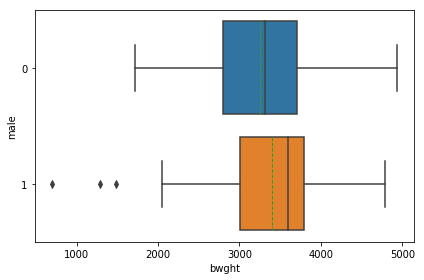

/anaconda3/envs/machine/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

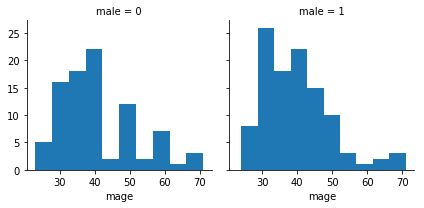

<Figure size 432x288 with 0 Axes>

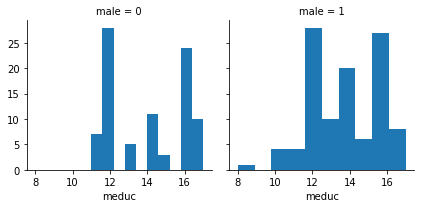

<Figure size 432x288 with 0 Axes>

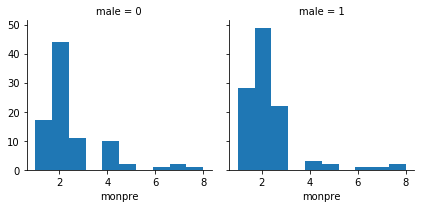

<Figure size 432x288 with 0 Axes>

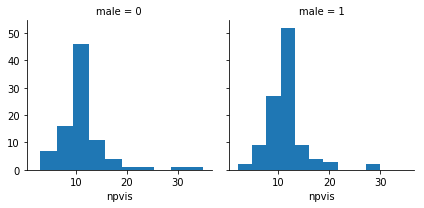

<Figure size 432x288 with 0 Axes>

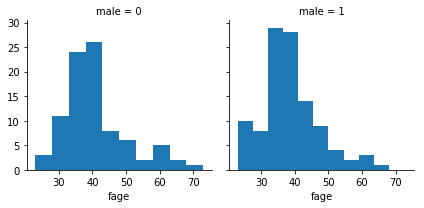

<Figure size 432x288 with 0 Axes>

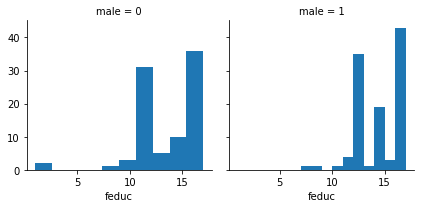

<Figure size 432x288 with 0 Axes>

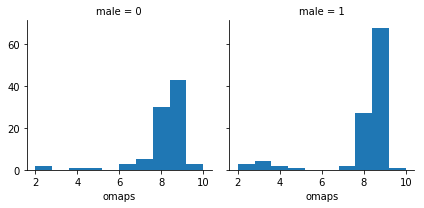

<Figure size 432x288 with 0 Axes>

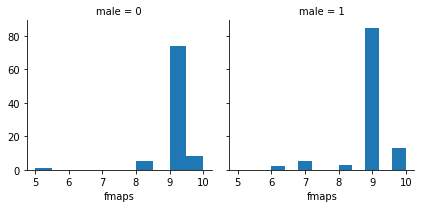

<Figure size 432x288 with 0 Axes>

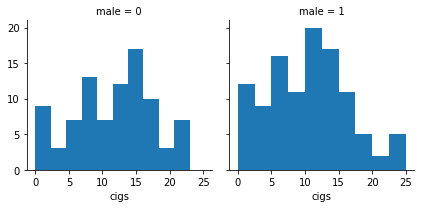

<Figure size 432x288 with 0 Axes>

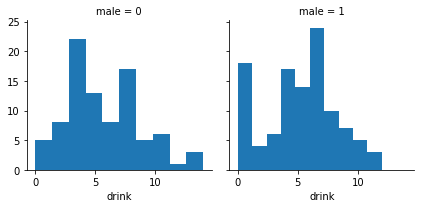

<Figure size 432x288 with 0 Axes>

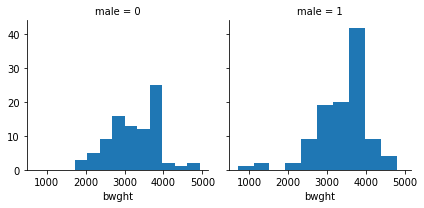

In [8]:
col_list = ['mage', 
            'meduc', 
            'monpre', 
            'npvis', 
            'fage', 
            'feduc', 
            'omaps', 
            'fmaps', 
            'cigs', 
            'drink', 
            'bwght']

for col in col_list:
    
    sns.boxplot(y = 'male',
                  x = col,
                  data = baby1,                         
                  orient ="h",
                  meanline = True,
                  showmeans = True)
                     
                                          
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

for cols in col_list:
    plt.figure()
    g = sns.FacetGrid(baby1, col='male')
    g.map(plt.hist, cols);   

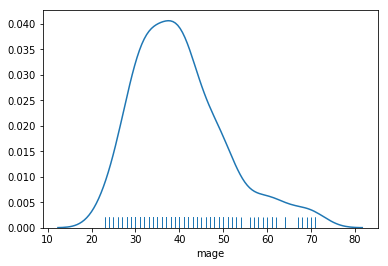

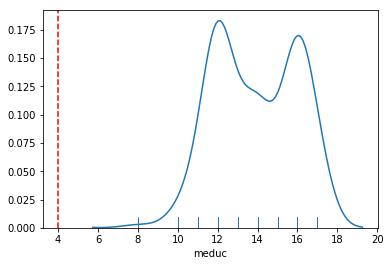

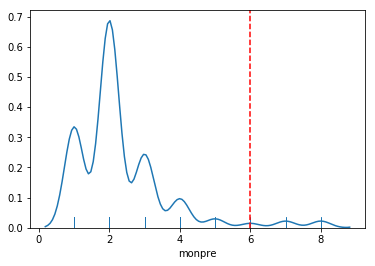

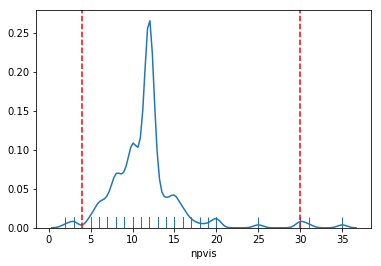

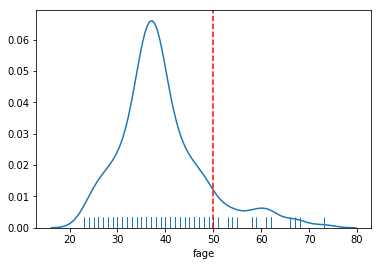

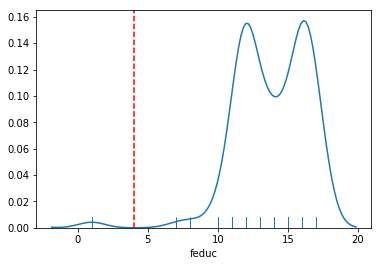

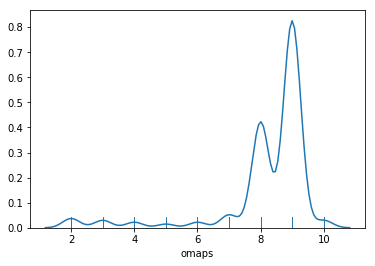

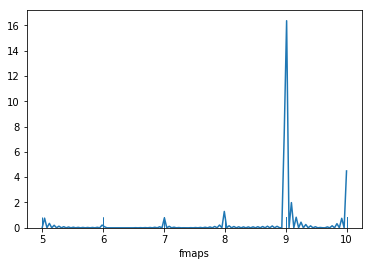

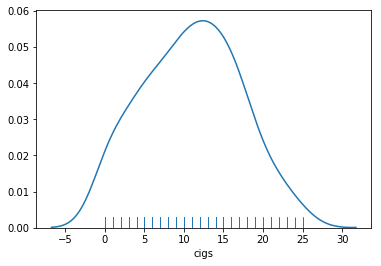

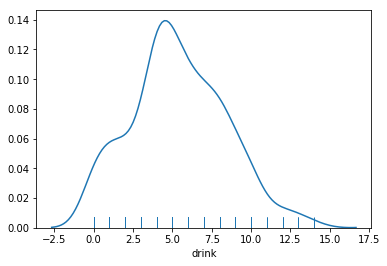

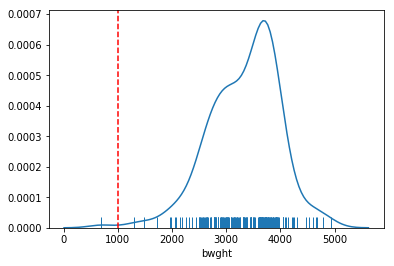

In [9]:
my_dict = {
	"mage": ['None','None'],
    "meduc": [4,'None'],
    "monpre": ['None',6],
    "npvis": [4,30],
    "fage": ['None',50],
    "feduc": [4,'None'],
    "omaps": ['None','None'], 
    "fmaps": ['None','None'],
    "cigs": ['None','None'],
    "drink": ['None','None'],
    "bwght": [1000,'None']
};    

for col in col_list:
    plt.figure()

    sns.distplot(baby1[col], hist=False, rug=True)

    
    if (my_dict[col][0] != 'None'):
        plt.axvline(x = my_dict[col][0],
            label = 'Outlier Thresholds',
            linestyle = '--',
            color = 'red')
   
    if (my_dict[col][1] != 'None'):
        plt.axvline(x = my_dict[col][1],
            label = 'Outlier Thresholds',
            linestyle = '--',
            color = 'red')   

baby2= pd.DataFrame.copy(baby1)

In [10]:
##### 3.4 Creation of new columns with outliers. ##############################

#from pandas.api.types import is_numeric_dtype
for col in col_list:
    #print(is_numeric_dtype(baby1[col]))
    if (my_dict[col][0] != 'None'):
        baby2['o_'+col] = baby2[col].apply(lambda val: -1 if val < my_dict[col][0] else 0)
    if (my_dict[col][1] != 'None'):
        baby2['o_'+col] = baby2[col].apply(lambda val: 1 if val > my_dict[col][1] else 0)
    
print(baby2.shape)
for col in baby2:
    print(col)   

(196, 27)
mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
blparents
health
mon
bwght
o_meduc
o_monpre
o_npvis
o_fage
o_feduc
o_bwght


In [11]:
###############################################################################
# 4 Correlation Analysis (INITIAL)
###############################################################################

##### 4.1 Correlations ########################################################


baby3= pd.DataFrame.copy(baby1)
baby3.head()
df_corr = baby3.corr().round(2)


print(df_corr)
df_corr.loc['bwght'].sort_values(ascending = False)

           mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  \
mage       1.00  -0.09    0.16  -0.05  0.58  -0.09  -0.21  -0.24  0.17   0.34   
meduc     -0.09   1.00   -0.23   0.14 -0.07   0.62   0.25   0.14  0.10  -0.07   
monpre     0.16  -0.23    1.00  -0.34  0.04  -0.29  -0.17  -0.08 -0.06   0.02   
npvis     -0.05   0.14   -0.34   1.00 -0.06   0.02   0.09   0.09  0.04  -0.07   
fage       0.58  -0.07    0.04  -0.06  1.00  -0.01  -0.16  -0.20  0.17   0.29   
feduc     -0.09   0.62   -0.29   0.02 -0.01   1.00   0.33   0.13  0.05  -0.12   
omaps     -0.21   0.25   -0.17   0.09 -0.16   0.33   1.00   0.64 -0.15  -0.18   
fmaps     -0.24   0.14   -0.08   0.09 -0.20   0.13   0.64   1.00 -0.09  -0.16   
cigs       0.17   0.10   -0.06   0.04  0.17   0.05  -0.15  -0.09  1.00   0.36   
drink      0.34  -0.07    0.02  -0.07  0.29  -0.12  -0.18  -0.16  0.36   1.00   
male      -0.05  -0.03   -0.08   0.00 -0.09   0.08  -0.01  -0.03 -0.12  -0.09   
mwhte      0.01  -0.28    0.

bwght        1.00
omaps        0.25
fmaps        0.25
mon          0.18
mblck        0.13
feduc        0.13
blparents    0.13
fblck        0.12
male         0.11
meduc        0.09
npvis        0.06
moth        -0.02
health      -0.03
fwhte       -0.04
monpre      -0.05
foth        -0.08
mwhte       -0.11
fage        -0.40
mage        -0.46
cigs        -0.57
drink       -0.74
Name: bwght, dtype: float64

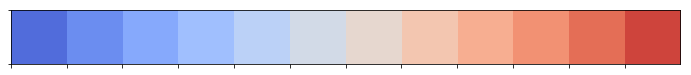

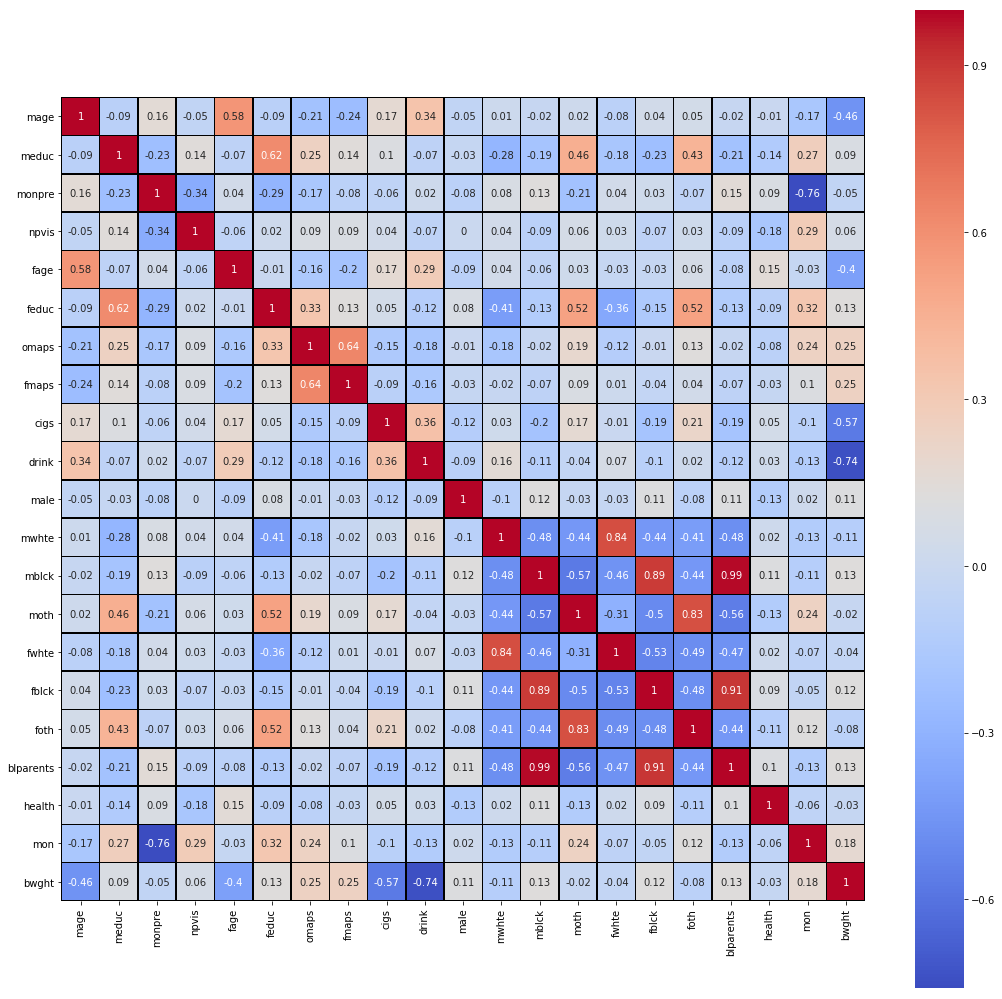

In [12]:
##### 4.2 Correlation Heatmap ################################################

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(18,18))


df_corr2 = df_corr.iloc[0:21, 0:21]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Baby Weight Correlation Heatmap.png')
plt.show()

baby3.to_excel('Baby_explored1.xlsx')
file = 'Baby_explored1.xlsx'
                        
baby4 = pd.read_excel(file)

In [13]:
###############################################################################
# 5 Base Model (NO FEATURE ENGINEERING)
###############################################################################

from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
import statsmodels.formula.api as smf # regression modeling
import sklearn.metrics # more metrics for model performance evaluation
from sklearn.model_selection import cross_val_score # k-folds cross validation

###### 5.1 Multivariate Regression Model (BASE MODEL) #########################


#I observed from the heatmap the variables that had the most correlation with
#Baby weight and made sure they correspond to our expternal research as well.
#These variables are represented below:

lm_fmaps = smf.ols(formula = """bwght ~                         
                           baby4['cigs'] +
                           baby4['drink'] +
                           baby4['fage'] +
                           baby4['feduc'] +
                           baby4['mage']
                           """,
                         data = baby4)

results = lm_fmaps.fit()
print(results.summary())
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     94.14
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.64e-49
Time:                        00:55:12   Log-Likelihood:                -1424.0
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     190   BIC:                             2880.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4784.3767    186.731     25.

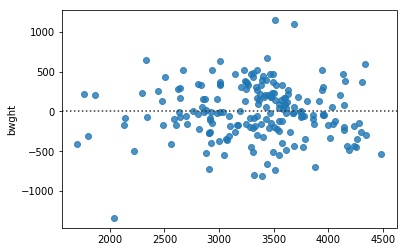

In [14]:
predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [baby4.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Baby Residuals.xlsx')

sns.residplot(x = predict,
              y = baby4.loc[:,'bwght'])


plt.show()



In [15]:
###### 5.2 Generalization using Train/Test Split (BASE MODEL) #################

#I have made sure to drop the variables that I haven't chosen above.
baby_data   = baby4.drop(['bwght',
                          'omaps',
                          'fmaps',
                          'meduc',
                            'monpre',
                            'npvis',
                            'male',
                            'mwhte',
                            'mblck',
                            'moth',
                            'fwhte',
                            'fblck',
                            'foth',],
                                axis = 1)

baby_target = baby4.loc[:, 'bwght']


X_train, X_test, y_train, y_test = \
    train_test_split(baby_data,
                     baby_target,                           
                     test_size = 0.10,
                     random_state = 508)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(176, 9)
(176,)
(20, 9)
(20,)


[0.9890810651997007, 0.9942554735777975, 0.9900421615238885, 0.9950785277443274, 0.9955015898358748, 0.9954297453620927, 0.9942062203223568, 0.9948464763389897, 0.9949588129359103, 0.9949667535841376, 0.9891140096949118, 0.9807923409643309, 0.9865238201568373, 0.9900720553342174, 0.9928181281451743, 0.9939482485167169, 0.9955086639090939, 0.99550631329917, 0.995947424036997, 0.9953025462502101, 0.9947894110735276, 0.9945761428627181, 0.993271711463759, 0.9922188708686013, 0.989520374679375, 0.9890936707130085, 0.9898892568590573, 0.9894420709112757, 0.987942558177016, 0.9879148979809675, 0.9877653573798926, 0.9870239317036831, 0.9871602346554282, 0.9866052516027259, 0.9858944306375742, 0.9853088040372678, 0.9845707462763814, 0.9835419544768583, 0.9821122242824777, 0.9802865700909831, 0.9784632387581089, 0.9773491987270582, 0.9762611068260055, 0.9739946702258906, 0.973213666663254, 0.9719180770173386, 0.9707137238735882, 0.9695534462410771, 0.9686852872652364, 0.9677868064304753]
The op

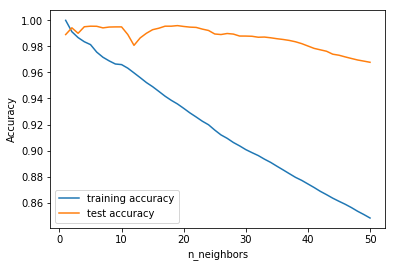

In [16]:
###### 5.3 Using KNN  on the optimal model (BASE MODEL) #######################


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



print(test_accuracy)

print("The optimal number of neighbors is at index", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

In [17]:
###### 5.4 KNN with Optimized Number of Neighbors (BASE MODEL) ################
#Based on section 5.3, the best results for the BASE MODEL occur when k = 13 

# Building a model with k = 13
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 13)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_knn_optimal)

# Generating Predictions based on the optimal KNN model
#knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

# Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")
    
# Calling the score method, which compares the predicted values to the actual
# values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)    

0.9865238201568373

Test set predictions:
[3471.46153846 3818.30769231 2946.         3696.84615385 2567.15384615
 4132.15384615 3313.76923077 3521.07692308 3673.76923077 2715.61538462
 2863.30769231 3435.84615385 2644.         1925.69230769 3099.92307692
 3954.84615385 3882.84615385 3246.23076923 3372.53846154 3760.69230769]

0.9865238201568373


In [18]:
###### 5.5 Prediction. Does OLS predict better than KNN? (BASE MODEL) #########


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)


print(f"""
Test set predictions:
{y_pred.round(2)}
""")

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_ols_optimal)


# Let's compare the testing score to the training score.

print('Training Score', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

# Printing model results
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")


Test set predictions:
[3471.46 3818.31 2946.   3696.85 2567.15 4132.15 3313.77 3521.08 3673.77
 2715.62 2863.31 3435.85 2644.   1925.69 3099.92 3954.85 3882.85 3246.23
 3372.54 3760.69]

0.9235677289844729
Training Score 0.917
Testing Score: 0.9236

Full model KNN score:    0.987
Optimal model KNN score: 0.987
Optimal model OLS score: 0.924



In [19]:
###### 5.6 Outputting Model Coefficients, Predictions, and Other Metrics (BASE MODEL)


# What does our leading model look like?
pd.DataFrame(list(zip(baby_data.columns, lr.coef_)))


# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred)))


# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)
print(lr_rsq)


# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)
print(lr_mse)


# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse)

0.9235677289844729
19771.079488805968
140.60967068024152


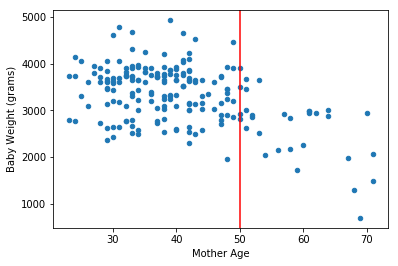

In [20]:
###############################################################################
# 6 Feature Engineering
###############################################################################
import numpy as np

#My base model was good but I want to see if by creating new variables
#through feature engineering we can increase the overall Testing Score.
#For this, I created 3 new variables also based on my external research:


# 'presponsible' to corresponds to parents that have been responsible in the 
# prenatal care of their child. So, parents that started the prenatal care in
# month 1 AND have a minimum of 12 visits of prenatal vistis will be considered
# as Responsible.
baby1['presponsible'] = np.where( (baby1['monpre']==1) & (baby1['npvis']>=12 ), 1,0)


# 'pblack' refers to if BOTH parents are black. From our external research we 
# observed that black parents could have babies with lower weight.
baby1['pblack'] = np.where( (baby1['mblck']==1) & (baby1['fblck']==1 ), 1,0)


# 'oldmom' refers to the mother that have babies at extreme risk age, which is
# more than 50 years old. From the Base Model, I realized that Mother's Age
# 'mage' as a whole is not quite siginificant. But I know from external
# reserach that as the mother's age preogresses, the baby's health is more at 
# risk, potentially affecting the weight (lower weights). To confirm this, I 
# first created a Scatterplot:

baby.plot(kind='scatter',x='mage',y='bwght')
plt.xlabel('Mother Age')
plt.ylabel('Baby Weight (grams)')
plt.axvline(50, color='red')
plt.savefig('Scatterplot bwght+mage.png')

#The scatterplot clearly shows how at the mother's age of 50 (approx) the 
#baby weight starts to decrease. Becasue of this, I have created the following
#varaible.
baby1['oldmom'] = np.where( (baby1['mage']>50), 1,0)


In [21]:
###############################################################################
# 7 New Correlation Analysis (WITH FEATURE ENGINEERING)
###############################################################################

# After creating 3 new featured engineered variables, I ran again our 
# correlations in order to update them.

##### 7.1 Correlations ########################################################


baby3= pd.DataFrame.copy(baby1)
baby3.head()
df_corr = baby3.corr().round(2)


print(df_corr)
df_corr.loc['bwght'].sort_values(ascending = False)

              mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  \
mage          1.00  -0.09    0.16  -0.05  0.58  -0.09  -0.21  -0.24  0.17   
meduc        -0.09   1.00   -0.23   0.14 -0.07   0.62   0.25   0.14  0.10   
monpre        0.16  -0.23    1.00  -0.34  0.04  -0.29  -0.17  -0.08 -0.06   
npvis        -0.05   0.14   -0.34   1.00 -0.06   0.02   0.09   0.09  0.04   
fage          0.58  -0.07    0.04  -0.06  1.00  -0.01  -0.16  -0.20  0.17   
feduc        -0.09   0.62   -0.29   0.02 -0.01   1.00   0.33   0.13  0.05   
omaps        -0.21   0.25   -0.17   0.09 -0.16   0.33   1.00   0.64 -0.15   
fmaps        -0.24   0.14   -0.08   0.09 -0.20   0.13   0.64   1.00 -0.09   
cigs          0.17   0.10   -0.06   0.04  0.17   0.05  -0.15  -0.09  1.00   
drink         0.34  -0.07    0.02  -0.07  0.29  -0.12  -0.18  -0.16  0.36   
male         -0.05  -0.03   -0.08   0.00 -0.09   0.08  -0.01  -0.03 -0.12   
mwhte         0.01  -0.28    0.08   0.04  0.04  -0.41  -0.18  -0.02  0.03   

bwght           1.00
omaps           0.25
fmaps           0.25
mon             0.18
blparents       0.13
feduc           0.13
mblck           0.13
fblck           0.12
male            0.11
pblack          0.11
meduc           0.09
npvis           0.06
presponsible    0.04
moth           -0.02
health         -0.03
fwhte          -0.04
monpre         -0.05
foth           -0.08
mwhte          -0.11
fage           -0.40
mage           -0.46
oldmom         -0.48
cigs           -0.57
drink          -0.74
Name: bwght, dtype: float64

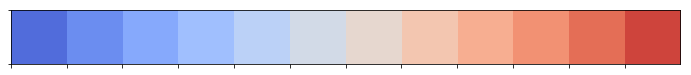

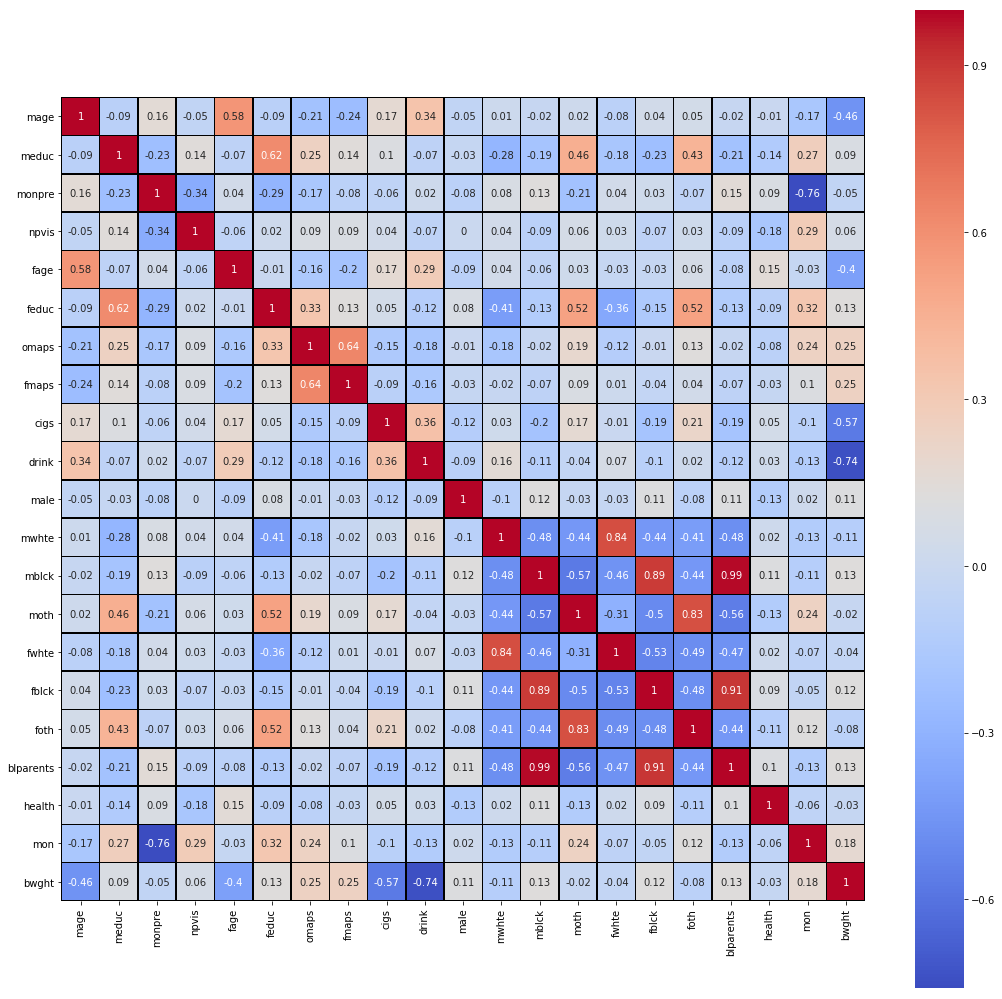

In [22]:
##### 7.2 Correlation Heatmap ################################################

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(18,18))


df_corr2 = df_corr.iloc[0:21, 0:21]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Baby Weight Correlation Heatmap.png')
plt.show()

baby3.to_excel('Baby_explored1.xlsx')
file = 'Baby_explored1.xlsx'
                        
baby4 = pd.read_excel(file)

# As believed, in the correlation heatmap we can see that 
# our new variable 'oldmom' has negative correlation of 0.5, which confirms 
# that affects the baby weight.

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     69.03
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.33e-48
Time:                        00:56:30   Log-Likelihood:                -1421.4
No. Observations:                 196   AIC:                             2859.
Df Residuals:                     188   BIC:                             2885.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4352.26

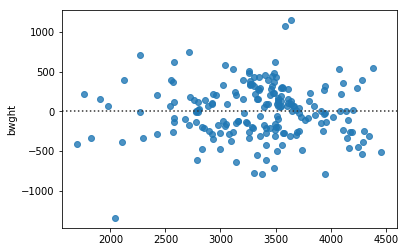

In [23]:
###############################################################################
# 8 Model A (WITH FEATURE ENGINEERING)
###############################################################################

# This a new model including ALL of the feature engineered variables to 
# see if we improve our testing score. We keep the original variables:
    # 'cigs'
    # 'drink'
    # 'fage'
    # 'feduc'
    
# I took out the original variable 'mage' to include the new variable 'oldmom'.

###### 8.1 Multivariate Regression Model (Model A) ############################


lm_fmaps = smf.ols(formula = """bwght ~                         
                           baby4['cigs'] +
                           baby4['drink'] +
                           baby4['fage'] +
                           baby4['feduc'] +
                           baby4['presponsible'] +
                           baby4['pblack'] +
                           baby4['oldmom']
                           """,
                         data = baby4)

results = lm_fmaps.fit()
print(results.summary())
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")

predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [baby4.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Baby Residuals.xlsx')

sns.residplot(x = predict,
              y = baby4.loc[:,'bwght'])


plt.show()

In [24]:
###### 8.2 Generalization using Train/Test Split (Model A) ###################

baby_data   = baby4.drop(['bwght',
                          'omaps',
                          'fmaps',
                          'meduc',
                            'monpre',
                            'npvis',
                            'male',
                            'mwhte',
                            'mblck',
                            'moth',
                            'fwhte',
                            'fblck',
                            'foth',
                            'mage'],
                                axis = 1)

baby_target = baby4.loc[:, 'bwght']


X_train, X_test, y_train, y_test = \
    train_test_split(baby_data,
                     baby_target,                           
                     test_size = 0.10,
                     random_state = 508)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(176, 11)
(176,)
(20, 11)
(20,)


[0.9937500604040986, 0.9930829092160225, 0.9953092485816045, 0.996684056603956, 0.994161024762781, 0.9938817681852848, 0.9936808575239995, 0.9950666945814141, 0.9858117770345299, 0.9865879531998709, 0.9869714737221443, 0.9816245725269058, 0.9864344489689647, 0.9894677096158315, 0.9922926990398272, 0.9925063392591364, 0.9946209462144784, 0.9954460678918444, 0.996101008000038, 0.9953622003715094, 0.995747241576846, 0.9959526518289866, 0.9954262416655544, 0.9931897301730124, 0.9931982212394341, 0.9934343100952957, 0.9919266487573304, 0.9909536962988826, 0.9889576508781073, 0.9887356817587784, 0.9885632912732008, 0.9864877528349456, 0.9860778232055649, 0.9857241894783254, 0.9851419252333551, 0.9848848173782158, 0.983413109995568, 0.9811325934069304, 0.9812799787248965, 0.9799758781064621, 0.9769696026016237, 0.9752735028550774, 0.9740354145875613, 0.9737908835706267, 0.9734954577668979, 0.9728918734827793, 0.9721577624002541, 0.9708102093020808, 0.969046464105824, 0.9675905889447934]
The o

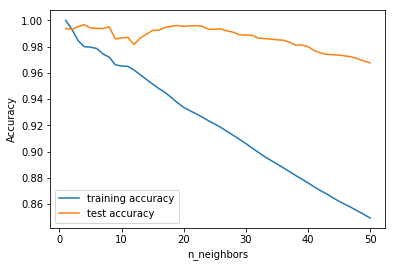

In [25]:
###### 8.3 Using KNN  on the optimal model (MODEL A) ##########################


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



print(test_accuracy)

print("The optimal number of neighbors is at index", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

In [26]:
###### 8.4 KNN with Optimized Number of Neighbors (MODEL A) ###################
#The best results occur when k = 13 

# Building a model with k = 13
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 13)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_knn_optimal)

# Generating Predictions based on the optimal KNN model
#knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

# Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")
    
# Calling the score method, which compares the predicted values to the actual
# values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)    



0.9864344489689647

Test set predictions:
[3498.15384615 3801.07692308 2947.76923077 3683.         2562.23076923
 4129.53846154 3297.07692308 3515.92307692 3671.61538462 2731.69230769
 2843.23076923 3439.84615385 2656.46153846 1919.15384615 3091.46153846
 3972.38461538 3885.30769231 3240.61538462 3357.15384615 3750.92307692]

0.9864344489689647


In [27]:
###### 8.5 Prediction. Does OLS predict better than KNN? (MODEL A) ############


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)


print(f"""
Test set predictions:
{y_pred.round(2)}
""")

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_ols_optimal)


# Let's compare the testing score to the training score.

print('Training Score', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

# Printing model results
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")



Test set predictions:
[3498.15 3801.08 2947.77 3683.   2562.23 4129.54 3297.08 3515.92 3671.62
 2731.69 2843.23 3439.85 2656.46 1919.15 3091.46 3972.38 3885.31 3240.62
 3357.15 3750.92]

0.9430892429145324
Training Score 0.9167
Testing Score: 0.9431

Full model KNN score:    0.986
Optimal model KNN score: 0.986
Optimal model OLS score: 0.943



In [28]:
###### 8.6 Outputting Model Coefficients, Predictions, and Other Metrics (MODEL A)


# What does our leading model look like?
pd.DataFrame(list(zip(baby_data.columns, lr.coef_)))


# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred)))


# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)
print(lr_rsq)


# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)
print(lr_mse)


# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse)

###### 8.7 Final Results (MODEL A) ############################################
# The overall scores improves with Model A. Compared to the Base Model (secion 5):
    # R-squared increased from 0.712 (BASE) to 0.720 (MODEL A)
    # Training Score increased from 0.716 (BASE) to 0.722 (MODEL A)
    # Testing Score increased from 0.651 (BASE) to 0.661 (MODEL A)
    

0.9430892429145323
14721.361633704792
121.33161844179278


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     80.96
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.42e-49
Time:                        00:57:15   Log-Likelihood:                -1421.4
No. Observations:                 196   AIC:                             2857.
Df Residuals:                     189   BIC:                             2880.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4350.08

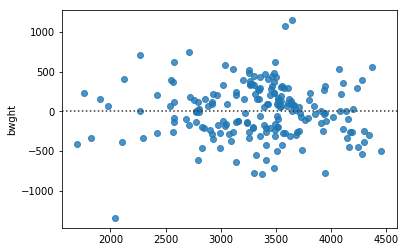

In [29]:
###############################################################################
# 9 Model B (WITH FEATURE ENGINEERING)
###############################################################################

# In the previous model I used all of the 3 new variables created. In this
# model I exclude 'plack' (if both parents are black) variable to determine
# if I get better resutls. I exclude it because of a low correlation.

###### 9.1 Multivariate Regression Model (MODEL B) ############################


lm_fmaps = smf.ols(formula = """bwght ~                         
                           baby4['cigs'] +
                           baby4['drink'] +
                           baby4['fage'] +
                           baby4['feduc'] +
                           baby4['presponsible'] +
                           baby4['oldmom']
                           """,
                         data = baby4)

results = lm_fmaps.fit()
print(results.summary())
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")

predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [baby4.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Baby Residuals.xlsx')

sns.residplot(x = predict,
              y = baby4.loc[:,'bwght'])


plt.show()

In [30]:
###### 9.2 Generalization using Train/Test Split (MODEL B) ####################

baby_data   = baby4.drop(['bwght',
                          'omaps',
                          'fmaps',
                          'meduc',
                            'monpre',
                            'npvis',
                            'male',
                            'mwhte',
                            'mblck',
                            'moth',
                            'fwhte',
                            'fblck',
                            'foth',
                            'mage',
                            'pblack'],
                                axis = 1)

baby_target = baby4.loc[:, 'bwght']


X_train, X_test, y_train, y_test = \
    train_test_split(baby_data,
                     baby_target,                           
                     test_size = 0.10,
                     random_state = 508)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(176, 10)
(176,)
(20, 10)
(20,)


[0.9937500604040986, 0.992791036611649, 0.9953113962828873, 0.996684056603956, 0.9941693750253697, 0.9940874105831418, 0.9936808575239995, 0.9950320377298497, 0.9858584704467594, 0.9865879531998709, 0.9869714737221443, 0.9815461814300728, 0.9864344489689647, 0.9894677096158315, 0.9922926990398272, 0.9925063392591364, 0.9946215882954157, 0.9954636790423658, 0.996101008000038, 0.9953611198629938, 0.995747241576846, 0.9959526518289866, 0.9954262416655544, 0.9931897301730124, 0.9931982212394341, 0.9934343100952957, 0.9919266487573304, 0.9909536962988826, 0.9889576508781073, 0.9887356817587784, 0.9885632912732008, 0.9873164746047881, 0.9860778232055649, 0.9857241894783254, 0.9851419252333551, 0.9848848173782158, 0.983413109995568, 0.9811325934069304, 0.9812810664275761, 0.9799758781064621, 0.9769696026016237, 0.9752735028550774, 0.974042092451771, 0.9737908835706267, 0.9734954577668979, 0.9728918734827793, 0.9721577624002541, 0.9708102093020808, 0.969046464105824, 0.9675905889447934]
The op

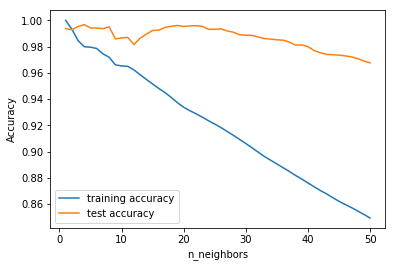

In [31]:
###### 9.3 Using KNN  on the optimal model (MODEL B) ##########################


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



print(test_accuracy)

print("The optimal number of neighbors is at index", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

In [32]:
###### 9.4 KNN with Optimized Number of Neighbors (MODEL B) ###################
#The best results occur when k = 14 

# Building a model with k = 14
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 14)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_knn_optimal)

# Generating Predictions based on the optimal KNN model
#knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

# Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")
    
# Calling the score method, which compares the predicted values to the actual
# values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)    

0.9894677096158315

Test set predictions:
[3485.78571429 3797.14285714 2940.         3687.21428571 2557.78571429
 4153.85714286 3298.5        3504.71428571 3674.64285714 2735.
 2833.         3451.28571429 2666.         1967.07142857 3087.07142857
 3968.07142857 3881.14285714 3235.57142857 3374.5        3748.28571429]

0.9894677096158315


In [33]:
###### 9.5 Prediction. Does OLS predict better than KNN? (MODEL B) ############


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)


print(f"""
Test set predictions:
{y_pred.round(2)}
""")

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_ols_optimal)


# Let's compare the testing score to the training score.

print('Training Score', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

# Printing model results
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")


Test set predictions:
[3485.79 3797.14 2940.   3687.21 2557.79 4153.86 3298.5  3504.71 3674.64
 2735.   2833.   3451.29 2666.   1967.07 3087.07 3968.07 3881.14 3235.57
 3374.5  3748.29]

0.9460547580579404
Training Score 0.916
Testing Score: 0.9461

Full model KNN score:    0.989
Optimal model KNN score: 0.989
Optimal model OLS score: 0.946



In [34]:
###### 9.6 Outputting Model Coefficients, Predictions, and Other Metrics (MODEL B)


# What does our leading model look like?
pd.DataFrame(list(zip(baby_data.columns, lr.coef_)))


# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred)))


# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)
print(lr_rsq)


# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)
print(lr_mse)


# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse)

0.9460547580579403
13954.25848674132
118.12814434647368


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     80.85
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.56e-49
Time:                        00:57:45   Log-Likelihood:                -1421.5
No. Observations:                 196   AIC:                             2857.
Df Residuals:                     189   BIC:                             2880.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4348.1705    192.906     

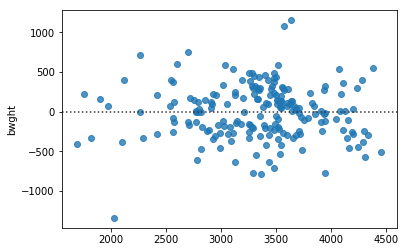

In [35]:
###### 9.7 Final Results (MODEL B) ############################################
# With Model B, only the Testin score improved, but not for much.
# Compared to Model A (secion 8):
    # R-squared remained the same at 0.720
    # Training Score remained the same at 0.722
    # Testing Score increased from 0.661 (MODEL A) to 0.665 (MODEL A)


###############################################################################
# 10 Model C (WITH FEAUTRE ENGINEERING)
###############################################################################

# The reusltus obtained in the prevuous model barely improved. Becasue of this
# I created a final model that includes the 2 new variables that based on the 
# external research should have the highest impact.
#
# I included 'oldmom' and 'pblack' to see if a combination of variables that
# take into account high-risk age for mothers and parent's race will have a 
# higher impact.

###### 10.1 Multivariate Regression Model (MODEL C) ###########·###############


lm_fmaps = smf.ols(formula = """bwght ~                         
                           baby4['cigs'] +
                           baby4['drink'] +
                           baby4['fage'] +
                           baby4['feduc'] +
                           baby4['pblack'] +
                           baby4['oldmom']
                           """,
                         data = baby4)

results = lm_fmaps.fit()
print(results.summary())
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")

predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

# Plotting residuals
residual_analysis = pd.concat(
        [baby4.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Baby Residuals.xlsx')

sns.residplot(x = predict,
              y = baby4.loc[:,'bwght'])


plt.show()

In [36]:
###### 10.2 Generalization using Train/Test Split (MODEL C) ###################

baby_data   = baby4.drop(['bwght',
                          'omaps',
                          'fmaps',
                          'meduc',
                            'monpre',
                            'npvis',
                            'male',
                            'mwhte',
                            'mblck',
                            'moth',
                            'fwhte',
                            'fblck',
                            'foth',
                            'presponsible',
                            'mage'],
                                axis = 1)

baby_target = baby4.loc[:, 'bwght']


X_train, X_test, y_train, y_test = \
    train_test_split(baby_data,
                     baby_target,                           
                     test_size = 0.10,
                     random_state = 508)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(176, 10)
(176,)
(20, 10)
(20,)


[0.9937500604040986, 0.9930829092160225, 0.9953092485816045, 0.996684056603956, 0.9941693750253697, 0.9947891451311289, 0.9936808575239995, 0.9950666945814141, 0.9858117770345299, 0.9865879531998709, 0.9870748599795054, 0.9816245725269058, 0.9864344489689647, 0.9894677096158315, 0.9922926990398272, 0.9925063392591364, 0.9946209462144784, 0.9954460678918444, 0.996101008000038, 0.9953622003715094, 0.995747241576846, 0.9959526518289866, 0.9954262416655544, 0.9931897301730124, 0.9931982212394341, 0.9934343100952957, 0.9919266487573304, 0.9909536962988826, 0.9889576508781073, 0.9887356817587784, 0.9885632912732008, 0.9864877528349456, 0.9860592296148284, 0.9857242643877681, 0.9851430613235032, 0.9848848173782158, 0.983413109995568, 0.9811307152243104, 0.9812799787248965, 0.9799758781064621, 0.9769696026016237, 0.9752735028550774, 0.9740354145875613, 0.9737908835706267, 0.9734954577668979, 0.9728918734827793, 0.9721577624002541, 0.9708102093020808, 0.9689635623711548, 0.9675905889447934]
The

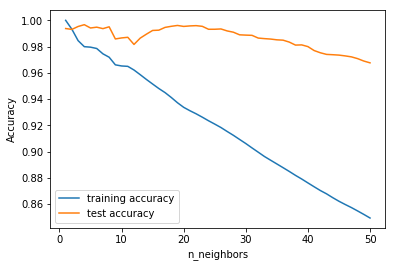

In [37]:
###### 10.3 Using KNN  on the optimal model (MODEL C) #########################


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



print(test_accuracy)

print("The optimal number of neighbors is at index", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

In [38]:
###### 10.4 KNN with Optimized Number of Neighbors (MODEL C) ##################
#The best results occur when k = 14

# Building a model with k = 14
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 14)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_knn_optimal)

# Generating Predictions based on the optimal KNN model
knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

# Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")
    
# Calling the score method, which compares the predicted values to the actual
# values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)    


0.9894677096158315

Test set predictions:
[3485.78571429 3797.14285714 2940.         3687.21428571 2557.78571429
 4153.85714286 3298.5        3504.71428571 3674.64285714 2735.
 2833.         3451.28571429 2666.         1967.07142857 3087.07142857
 3968.07142857 3881.14285714 3235.57142857 3374.5        3748.28571429]

0.9894677096158315


In [39]:
###### 10.5 Prediction. Does OLS predict better than KNN? (MODEL C) ###########


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)


print(f"""
Test set predictions:
{y_pred.round(2)}
""")

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_ols_optimal)


# Let's compare the testing score to the training score.

print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

# Printing model results
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")


Test set predictions:
[3485.79 3797.14 2940.   3687.21 2557.79 4153.86 3298.5  3504.71 3674.64
 2735.   2833.   3451.29 2666.   1967.07 3087.07 3968.07 3881.14 3235.57
 3374.5  3748.29]

0.9430572878179801
Training Score: 0.9167
Testing Score: 0.9431

Full model KNN score:    0.989
Optimal model KNN score: 0.989
Optimal model OLS score: 0.943



In [40]:
###### 10.6 Outputting Model Coefficients, Predictions, and Other Metrics (MODEL C)


# What does our leading model look like?
pd.DataFrame(list(zip(baby_data.columns, lr.coef_)))


# How well are we predicting on each observation?
pd.DataFrame(list(zip(y_test, lr_pred)))


# R-Square (same as the score above)
lr_rsq = sklearn.metrics.r2_score(y_test, lr_pred)
print(lr_rsq)


# Mean Squared Error
lr_mse = sklearn.metrics.mean_squared_error(y_test, lr_pred)
print(lr_mse)


# Root Mean Squared Error (how far off are we on each observation?)
lr_rmse = pd.np.sqrt(lr_mse)
print(lr_rmse)


###### 10.7 Final Results (MODEL C) ############################################
# The Testing Score improved with Model C. THIS IS THE BEST MODEL.
# Compared to Model B (secion 9):
    # R-squared remained the same at 0.720
    # Training Score remained the same at 0.722
    # Testing Score increased from 0.665 (MODEL B) to 0.675 (MODEL C)


0.9430572878179801
14729.627602327906
121.36567720046679


In [41]:
###### 10.8 Storing Model Predictions and Summary (MODEL C) ###################

# Storing predictions as a dictionary.
model_predictions_df = pd.DataFrame({'Actual' : y_test,
                                     'KNN_Predicted': knn_reg_optimal_pred,
                                     'OLS_Predicted': lr_pred})



model_predictions_df.to_excel('A1 Final Model Predictions - Team 1 - Section 3.xlsx')




model_results = pd.DataFrame({'Model' : ['Full model KNN score', 'Optimal model KNN score', 'Optimal model OLS score'],
                              'Summary': [y_score.round(3), y_score_knn_optimal.round(3), y_score_ols_optimal.round(3)],
                              '' : ['','',''],
                              'Training Score' : [lr.score(X_train, y_train).round(4), '', ''],
                              'Testing Score' : [lr.score(X_test, y_test).round(4), '', ''],
                              'R-Squared' : [results.rsquared.round(3), '', ''],
                              'Adjusted R-Squared' : [results.rsquared_adj.round(3), '', '']
                              })


model_results.to_excel('Model Summary-Birthweight.xlsx')


In [42]:
###############################################################################
# 11 Model D (WITH A SUBSET OF THE ORIGNAL DATA)
###############################################################################

# Seeing how the age of mothers made our previous models more significant, 
# I decided to create one final model with a SUBSET of the original data, 
# taking only the observations where 'mage' is equal or higher than 45 years.
# I intend to observe if by limiting the data only to mothers with high-risk
# age, our testing and prediting scores will go up.
    
baby5 = baby3[baby3['mage']>=45]
print(baby5.shape)
#np.where( (baby4['mage']>60), 1,0)

(51, 24)


In [43]:
###### 11.1 Multivariate Regression Model (MODEL D) ############################





# Building a Regression Base Model
lm_fmaps = smf.ols(formula = """bwght ~ 
                           baby5['mage'] +
                           baby5['cigs'] +
                           baby5['drink'] +
                           baby5['feduc'] +
                           baby5['fage']
                           """,
                         data = baby5)

results = lm_fmaps.fit()
print(results.summary())
print(f"""
Parameters:
{results.params.round(2)}

Summary Statistics:
R-Squared:          {results.rsquared.round(3)}
Adjusted R-Squared: {results.rsquared_adj.round(3)}
""")

predict = results.predict()
y_hat   = pd.DataFrame(predict).round(2)
resids  = results.resid.round(2)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     33.26
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.78e-14
Time:                        00:58:28   Log-Likelihood:                -368.45
No. Observations:                  51   AIC:                             748.9
Df Residuals:                      45   BIC:                             760.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5461.3418    493.033     11.

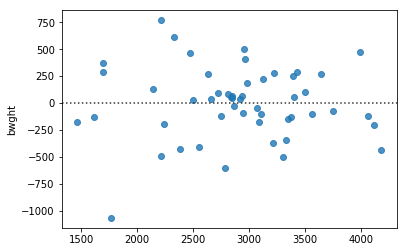

In [44]:
# Plotting residuals
residual_analysis = pd.concat(
        [baby5.loc[:,'bwght'],
         y_hat,
         results.resid.round(2)],
         axis = 1)

residual_analysis.to_excel('Baby Residuals.xlsx')

sns.residplot(x = predict,
              y = baby5.loc[:,'bwght'])


plt.show()

In [45]:
###### 11.2 Generalization using Train/Test Split (MODEL D) ###################

baby_data   = baby5.drop(['bwght',
                          'omaps',
                          'fmaps',
                          'meduc',
                            'monpre',
                            'npvis',
                            'male',
                            'mwhte',
                            'mblck',
                            'moth',
                            'fwhte',
                            'fblck',
                            'foth'],
                                axis = 1)

baby_target = baby5.loc[:, 'bwght']


X_train, X_test, y_train, y_test = \
    train_test_split(baby_data,
                     baby_target,                           
                     test_size = 0.10,
                     random_state = 508)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(45, 11)
(45,)
(6, 11)
(6,)


[0.4238381713172551, 0.5319876718927306, 0.5732007665804841, 0.42993128720434903, 0.5900488603512285, 0.4411353380851286, 0.4057135864746474, 0.27851706157244627, 0.25579328532988177, 0.18681342575026316, 0.13266425591253794, 0.09123541803546487, 0.00027926966342173287, -0.047973141862482915, -0.06306332552054839, -0.01829697333436786, 0.0006857472532271203, 0.012761463384867389, 0.07975857640771733, 0.17477633030741557, 0.23692701359166046, 0.15650853732846126, 0.1294778988327211, 0.1962479807808133, 0.19643825348101185, 0.09055443638118921, 0.07113110211351881, 0.05929829923027363, 0.0634040636183798, 0.02736195474929648, 0.015321406408172589, 0.04783684650656583, 0.01651484067929232, -0.025575552368701793, -0.00954593544411586, 0.005237122716392539, 0.02496614278440179, 0.00021956395182609612, -0.0011558317830488996]
The optimal number of neighbors is at index 4 with an optimal score of 0.5900488603512285


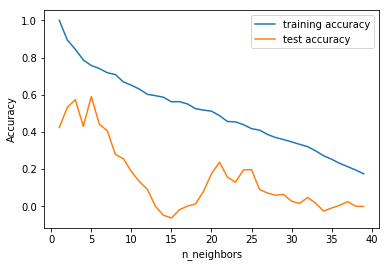

In [46]:
###### 11.3 Using KNN  on the optimal model (MODEL D) #########################


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 40)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



print(test_accuracy)

print("The optimal number of neighbors is at index", \
      test_accuracy.index(max(test_accuracy)), \
      "with an optimal score of", \
      max(test_accuracy))

In [47]:
###### 11.4 KNN with Optimized Number of Neighbors (MODEL D) ##################
#The best results occur when k = 3

# Building a model with k = 3
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 3)

# Fitting the model based on the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)

# Scoring the model
y_score_knn_optimal = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_knn_optimal)

# Generating Predictions based on the optimal KNN model
#knn_reg_optimal_pred = knn_reg_fit.predict(X_test)

# Predicting on the X_data that the model has never seen before
y_pred = knn_reg.predict(X_test)

# Printing out prediction values for each test observation
print(f"""
Test set predictions:
{y_pred}
""")

0.5732007665804841

Test set predictions:
[2639.33333333 2617.66666667 2922.66666667 3314.33333333 3219.66666667
 2943.        ]



In [48]:
# Calling the score method, which compares the predicted values to the actual
# values
y_score = knn_reg.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score)    

###### 11.5 Prediction. Does OLS predict better than KNN? (MODEL D) ###########

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)


print(f"""
Test set predictions:
{y_pred.round(2)}
""")

# Scoring the model
y_score_ols_optimal = lr_fit.score(X_test, y_test)

# The score is directly comparable to R-Square
print(y_score_ols_optimal)


# Let's compare the testing score to the training score.

print('Training Score', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

# Printing model results
print(f"""
Full model KNN score:    {y_score.round(3)}
Optimal model KNN score: {y_score_knn_optimal.round(3)}
Optimal model OLS score: {y_score_ols_optimal.round(3)}
""")

0.5732007665804841

Test set predictions:
[2639.33 2617.67 2922.67 3314.33 3219.67 2943.  ]

0.3730877578185675
Training Score 0.8249
Testing Score: 0.3731

Full model KNN score:    0.573
Optimal model KNN score: 0.573
Optimal model OLS score: 0.373



In [ ]:
###### 11.6 Final Results (MODEL D) ############################################

# Even though this model produces a higher R-suqared and higher Training Score
# compared to our best model (Model C), it returns a much lower Testing SCore 
# and therfore the gap between Training and Testing scores is higher.

# Because of this, this IS NOT A GOOD model and MODEL C IS STILL THE BEST ONE.
# Compared to Model C:
    # R-squared increases from 0.720 (Model C) to 0.787 (Model D)
    # Training Score increases from 0.722 (Model C) to 0.806 (Model D)
    # Testing Score DESCREASES from 0.675 (Model C) to 0.623 (Model D)
    